In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

df = pd.read_csv('5000 Sales Records.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          5000 non-null   object 
 1   Country         5000 non-null   object 
 2   Item Type       5000 non-null   object 
 3   Sales Channel   5000 non-null   object 
 4   Order Priority  5000 non-null   object 
 5   Order Date      5000 non-null   object 
 6   Order ID        5000 non-null   int64  
 7   Ship Date       5000 non-null   object 
 8   Units Sold      5000 non-null   int64  
 9   Unit Price      5000 non-null   float64
 10  Unit Cost       5000 non-null   float64
 11  Total Revenue   5000 non-null   float64
 12  Total Cost      5000 non-null   float64
 13  Total Profit    5000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


In [118]:
df.columns = df.columns.str.lower()
df.columns

Index(['region', 'country', 'item type', 'sales channel', 'order priority',
       'order date', 'order id', 'ship date', 'units sold', 'unit price',
       'unit cost', 'total revenue', 'total cost', 'total profit'],
      dtype='object')

In [119]:
df['order date'] = pd.to_datetime(df['order date'])
df['ship date'] = pd.to_datetime(df['ship date'])
df.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015-04-13,192993152,2015-05-07,9817,255.28,159.42,2506083.76,1565026.14,941057.62


Изменил 'item type' на тип category, так как он представляет из себя ограниченный список текстовых значений. 'order date' и 'ship date' переведены в datetime для корректного отображения.

<li>Обработайте пропуски при необходимости

Пропусков нет. Следовательно, и обрабатывать их незачем.

<li>Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [120]:
df['total_profit_by_region'] = df.groupby('region')['total profit'].transform('sum')
df.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit,total_profit_by_region
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72,2.046120e+08
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38,2.046120e+08
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,5.016760e+08
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2.782377e+08
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88,2.782377e+08
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88,2.313803e+08
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52,1.749346e+08
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88,5.016760e+08
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04,2.313803e+08
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015-04-13,192993152,2015-05-07,9817,255.28,159.42,2506083.76,1565026.14,941057.62,5.311423e+08


<b>Шаг 3.1. Проведите исследовательский анализ данных для регионов</b>

<li>Выявите регион с самым большим и самым маленьким Total Cost, Total Revenue,
Total Profit

In [121]:
df.groupby('region').agg({'total cost': 'sum', 'total revenue': 'sum', 'total profit': 'sum',}).sort_values(by=['total cost', 'total revenue', 'total profit'], ascending=False)

,total cost,total revenue,total profit
region,,,
Sub-Saharan Africa,1.283425e+09,1.814567e+09,5.311423e+08
Europe,1.201946e+09,1.703622e+09,5.016760e+08
Asia,6.420394e+08,9.202771e+08,2.782377e+08
Middle East and North Africa,5.354875e+08,7.668678e+08,2.313803e+08
Central America and the Caribbean,4.803643e+08,6.849763e+08,2.046120e+08
Australia and Oceania,4.124295e+08,5.873641e+08,1.749346e+08
North America,1.097739e+08,1.510143e+08,4.124040e+07


Можно сделать вывод,что Sub-Saharan Africa является регионом с самой высокой доходностью, а North America - с самой низкой

<li>Выявите регион с самым большим и самым маленьким Units Sold, Unit Price, Unit
Cost

In [122]:
df.groupby('region').agg({'units sold': 'sum', 'unit price': 'sum', 'unit cost': 'sum',}).sort_values(by=['units sold', 'unit price', 'unit cost'], ascending=False)

,units sold,unit price,unit cost
region,,,
Sub-Saharan Africa,6642380,349025.54,246882.89
Europe,6582322,352308.41,249038.26
Asia,3620036,183556.72,128579.21
Middle East and North Africa,3013431,157454.57,110155.63
Central America and the Caribbean,2698776,138441.97,97945.33
Australia and Oceania,2111786,116833.27,82580.72
North America,484760,31107.34,22288.68


Можно сделать вывод, что Sub-Saharan Africa является регионом с cамыми высокими продажами, а North America - с самыми низкими

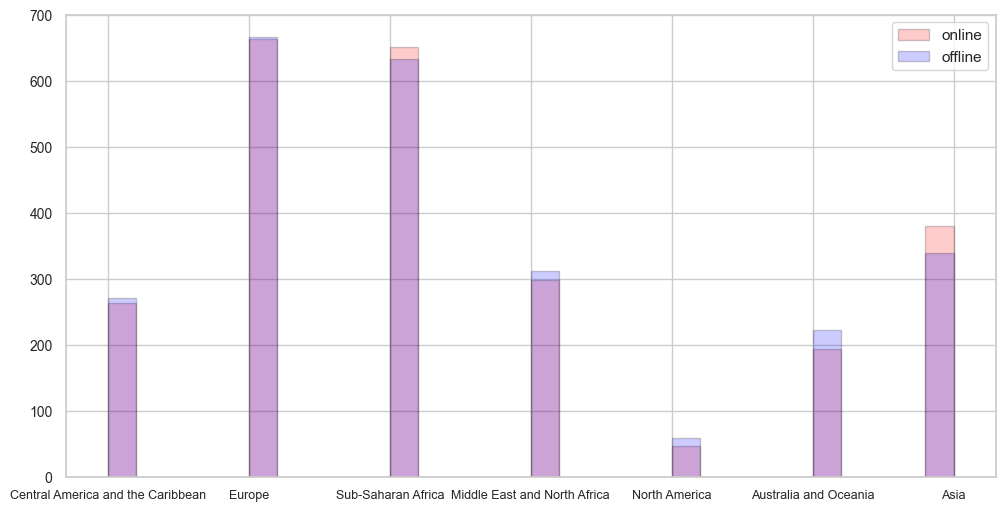

In [127]:
online = df[df['sales channel'] == 'Online']
offline = df[df['sales channel'] == 'Offline']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(online['region'], color='red', alpha=0.2, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.hist(offline['region'], color='blue', alpha=0.2, edgecolor='black', linewidth=1, label='offline', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

В Central America and the Caribbean	и Europe продажи примерно одинаковые, в Sub-Saharan Africa и Asia немного лидируют онлайн-продажи, в Middle East and North Africa, North Africa и Australia and Oceania - лидируют оффлайн-продажи

<li>Разделите таблицу по Item Type — продовольственные и не продовольственные
товары

Для начала узнаем, какие товары есть в таблице

In [124]:
items = df['item type'].unique()
for i in range(len(items)): print(f"{i+1}.{items[i]}") 

1.Baby Food
2.Snacks
3.Beverages
4.Cereal
5.Personal Care
6.Clothes
7.Office Supplies
8.Cosmetics
9.Meat
10.Fruits
11.Vegetables
12.Household


Разделяем таблицу по item type

In [125]:
food = ['Baby Food', 'Snacks', 'Beverages', 'Cereal', 'Meat', 'Fruits', 'Vegetables']
df['food or non-food'] = df['item type']
for columns, series in df.items():
    if columns == 'food or non-food':
        for i in range(len(series)):
            if series[i] in food: series[i] = 'food'
            else: series[i] = 'not food'

df.head(10)

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit,total_profit_by_region,food or non-food
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,159.42,140914.56,87999.84,52914.72,2.046120e+08,food
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,97.44,330640.86,211152.48,119488.38,2.046120e+08,food
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,31.79,226716.10,151892.62,74823.48,5.016760e+08,food
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,117.11,1854591.20,1055863.76,798727.44,2.782377e+08,food
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,97.44,1150758.36,734892.48,415865.88,2.782377e+08,food
5,Middle East and North Africa,Morocco,Personal Care,Offline,L,2010-11-08,412882792,2010-11-22,48,81.73,56.67,3923.04,2720.16,1202.88,2.313803e+08,not food
6,Australia and Oceania,Federated States of Micronesia,Clothes,Offline,H,2011-03-28,932776868,2011-05-10,8258,109.28,35.84,902434.24,295966.72,606467.52,1.749346e+08,not food
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013-10-14,919133651,2013-11-04,927,109.28,35.84,101302.56,33223.68,68078.88,5.016760e+08,not food
8,Middle East and North Africa,Afghanistan,Clothes,Offline,M,2016-08-27,579814469,2016-10-05,8841,109.28,35.84,966144.48,316861.44,649283.04,2.313803e+08,not food
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015-04-13,192993152,2015-05-07,9817,255.28,159.42,2506083.76,1565026.14,941057.62,5.311423e+08,food


<li>Постройте гистограмму по доходу от продаж по типам товаров в зависмости от типа
продажи (2 графика)

1 график (онлайн-продажи)

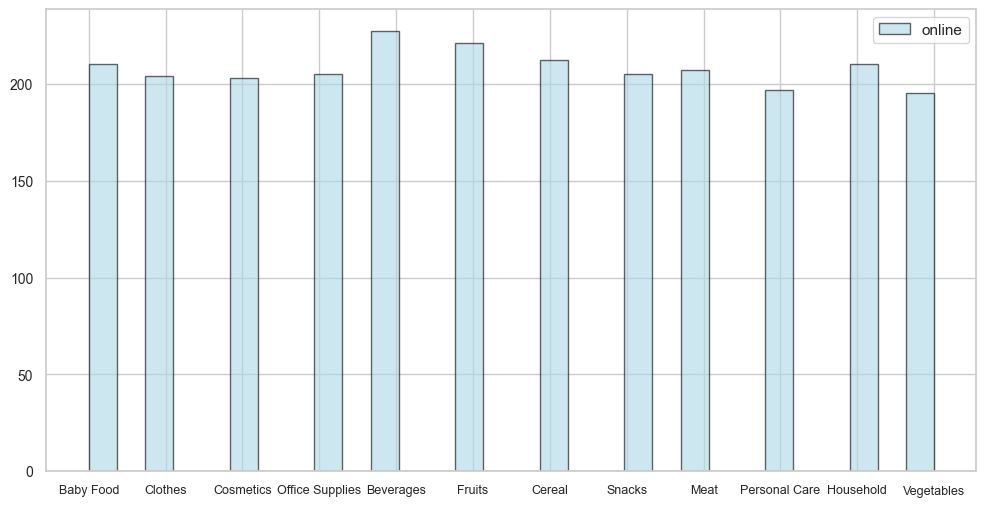

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(online['item type'], color='lightblue', alpha=0.6, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

2 график(оффлайн-продажи)

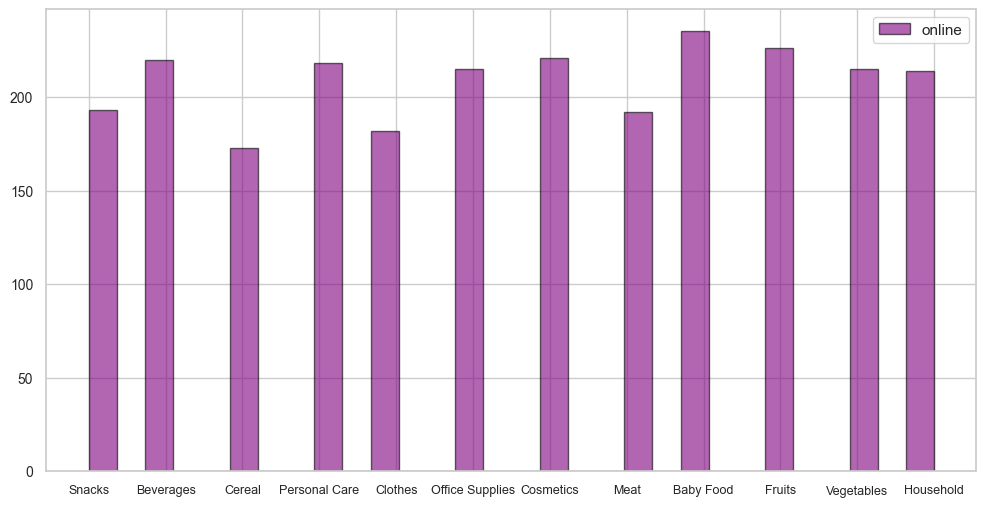

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(offline['item type'], color='purple', alpha=0.6, edgecolor='black', linewidth=1, label='online', align='mid', bins=30)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

<li>Просуммируйте данные по Total Profit по годам и постройте гисторгамму по региону в
зависмости от года

In [137]:
df.groupby(df['order date'].dt.year)['total profit'].transform('sum')

0       2.649971e+08
1       2.415637e+08
2       2.583138e+08
3       2.415637e+08
4       2.727459e+08
            ...     
4995    2.727459e+08
4996    2.564095e+08
4997    2.539424e+08
4998    2.564095e+08
4999    2.583138e+08
Name: total profit, Length: 5000, dtype: float64

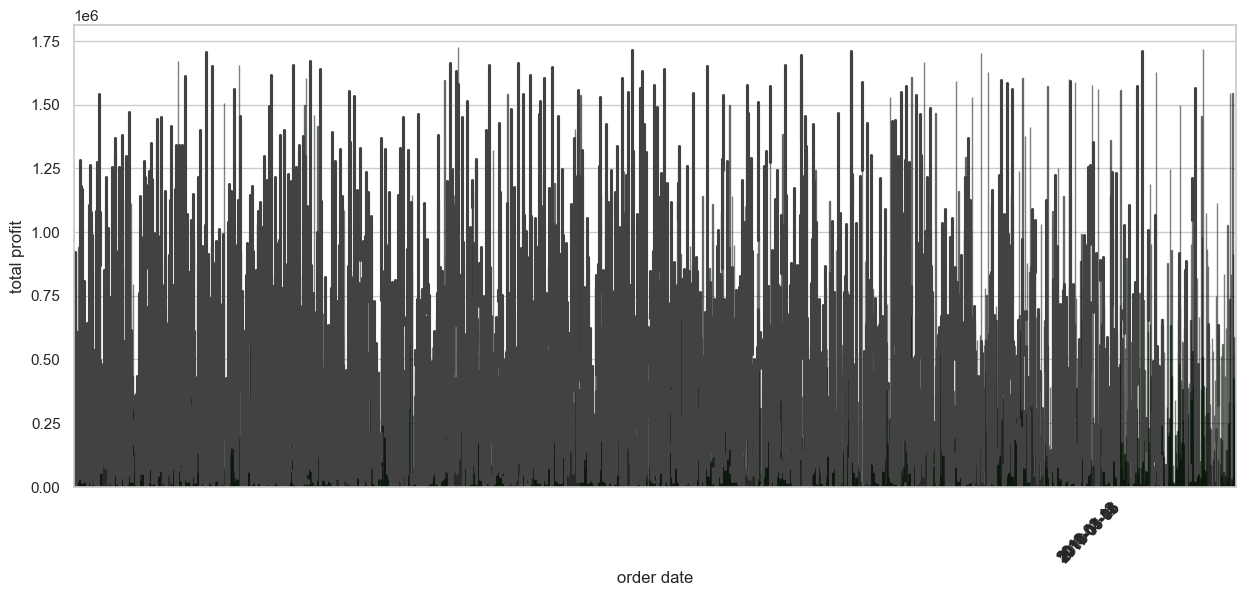

In [136]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(x=df['order date'].dt.year, y='total profit', data=df, color='green', alpha=0.5, edgecolor='black', linewidth=1)
plt.xticks(df['order date'].dt.year[pd.notna(df['order date'].dt.year)].unique(), rotation=45)
plt.show()